# Introduction to data exploration mainly using Pandas

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: simple manipulation of dataframe and series

### Quick exploration of the format of our data

The first step will be to open a CSV file which contain some information about some voting count of a referendum in France.

In [2]:
filename_referendum = os.path.join('data', 'referendum.csv')

The data are not separated with a comma but a semi-colummn.

In [3]:
df = pd.read_csv(filename_referendum, sep=';')

In [4]:
df.head()

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52


In [5]:
df.tail()

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
36786,ZZ,FRANCAIS DE L'ETRANGER,7,Europe centrale,89643,54981,318,17055,17289
36787,ZZ,FRANCAIS DE L'ETRANGER,8,"Europe du Sud, Turquie, Israël",109763,84466,292,9299,15706
36788,ZZ,FRANCAIS DE L'ETRANGER,9,Afrique Nord-Ouest,98997,59887,321,22116,16673
36789,ZZ,FRANCAIS DE L'ETRANGER,10,"Afrique Centre, Sud et Est",89859,46782,566,17008,25503
36790,ZZ,FRANCAIS DE L'ETRANGER,11,"Europe de l'est, Asie, Océanie",80061,42911,488,13975,22687


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 9 columns):
Department code    36791 non-null object
Department name    36791 non-null object
Town code          36791 non-null int64
Town name          36791 non-null object
Registered         36791 non-null int64
Abstentions        36791 non-null int64
Null               36791 non-null int64
Choice A           36791 non-null int64
Choice B           36791 non-null int64
dtypes: int64(6), object(3)
memory usage: 2.5+ MB


In [7]:
df.index

RangeIndex(start=0, stop=36791, step=1)

In [8]:
df.columns

Index(['Department code', 'Department name', 'Town code', 'Town name',
       'Registered', 'Abstentions', 'Null', 'Choice A', 'Choice B'],
      dtype='object')

It will be easier with we use the name of the city as an index.

In [9]:
df = df.set_index('Town name')

In [10]:
df.head()

,Department code,Department name,Town code,Registered,Abstentions,Null,Choice A,Choice B
Town name,,,,,,,,
L'Abergement-Clémenciat,1,AIN,1,592,84,9,154,345
L'Abergement-de-Varey,1,AIN,2,215,36,5,66,108
Ambérieu-en-Bugey,1,AIN,4,8205,1698,126,2717,3664
Ambérieux-en-Dombes,1,AIN,5,1152,170,18,280,684
Ambléon,1,AIN,6,105,17,1,35,52


### Let's answer to some basic questions

* What is the city with the most registered people?

In [11]:
df.loc[:, 'Registered'].head()

Town name
L'Abergement-Clémenciat     592
L'Abergement-de-Varey       215
Ambérieu-en-Bugey          8205
Ambérieux-en-Dombes        1152
Ambléon                     105
Name: Registered, dtype: int64

In [12]:
col_registered = df.loc[:, 'Registered']

In [13]:
col_registered.max()

1253322

In [14]:
col_registered == col_registered.max()

Town name
L'Abergement-Clémenciat           False
L'Abergement-de-Varey             False
Ambérieu-en-Bugey                 False
Ambérieux-en-Dombes               False
Ambléon                           False
Ambronay                          False
Ambutrix                          False
Andert-et-Condon                  False
Anglefort                         False
Apremont                          False
Aranc                             False
Arandas                           False
Arbent                            False
Arbignieu                         False
Arbigny                           False
Argis                             False
Armix                             False
Ars-sur-Formans                   False
Artemare                          False
Asnières-sur-Saône                False
Attignat                          False
Bâgé-la-Ville                     False
Bâgé-le-Châtel                    False
Balan                             False
Baneins                       

In [15]:
mask_most_registered = col_registered == col_registered.max()

In [16]:
col_registered.loc[mask_most_registered]

Town name
Paris    1253322
Name: Registered, dtype: int64

In [17]:
df.loc[mask_most_registered]

,Department code,Department name,Town code,Registered,Abstentions,Null,Choice A,Choice B
Town name,,,,,,,,
Paris,75,PARIS,56,1253322,248755,12093,506594,485880


* What is the city with the least number of registered persons?

In [18]:
mask_least_registered = col_registered == col_registered.min()

In [19]:
df.loc[mask_least_registered]

,Department code,Department name,Town code,Registered,Abstentions,Null,Choice A,Choice B
Town name,,,,,,,,
Douaumont,55,MEUSE,164,6,0,0,0,6


Let's go to the `notebook.ipynb` to formalize the different aspect we just used up to now.

## Part 2: Group information together.

Let's now make a more advance analysis. Instead to make a micro-analysis by cities, we would like to make a macro-analysis by department.

In [20]:
df.head()

,Department code,Department name,Town code,Registered,Abstentions,Null,Choice A,Choice B
Town name,,,,,,,,
L'Abergement-Clémenciat,1,AIN,1,592,84,9,154,345
L'Abergement-de-Varey,1,AIN,2,215,36,5,66,108
Ambérieu-en-Bugey,1,AIN,4,8205,1698,126,2717,3664
Ambérieux-en-Dombes,1,AIN,5,1152,170,18,280,684
Ambléon,1,AIN,6,105,17,1,35,52


Therefore, we would like group the votes by department and add them up.

In [21]:
df.groupby('Department code').sum()

,Town code,Registered,Abstentions,Null,Choice A,Choice B
Department code,,,,,,
1,96341,393808,65996,6453,116379,204980
10,96568,203590,37939,3466,54743,107442
11,96472,264288,43641,4299,102595,113753
12,46538,218347,32095,4539,83404,98309
13,7140,1314766,257432,16711,428682,611941
14,270982,490547,82498,6617,176764,224668
15,35148,120962,20366,2190,42528,55878
16,85276,260765,46641,4665,100785,108674
17,114973,471947,85478,7728,163065,215676


In [36]:
df_department = df.groupby(['Department code', 'Department name']).sum().reset_index()

## Part 3: Merging information together

We would like to plot some of the information into the a map.

In [37]:
import geopandas as gpd

In [38]:
gdf_department = gpd.read_file(os.path.join('data', 'departements.geojson'))

In [39]:
type(gdf_department)

geopandas.geodataframe.GeoDataFrame

In [40]:
gdf_department.head()

,code,nom,geometry
0,02,Aisne,"POLYGON ((3.172704445659 50.011996744997, 3.18..."
1,10,Aube,"POLYGON ((3.4147888224632 48.390268550005, 3.4..."
2,14,Calvados,"POLYGON ((-1.1196198636379 49.355568981262, -1..."
3,15,Cantal,"POLYGON ((2.5084125130653 45.478501516921, 2.5..."
4,28,Eure-et-Loir,"POLYGON ((0.8148247207739 48.670163564137, 0.8..."


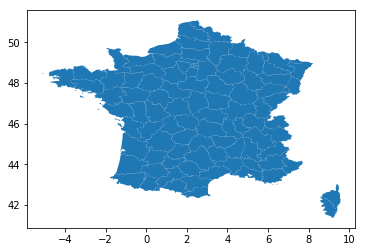

In [41]:
gdf_department.plot()

So what we need at that stage is to merge the different dataframe together.

In [42]:
df = gdf_department.merge(df_department, how='inner', left_on='code', right_on='Department code')

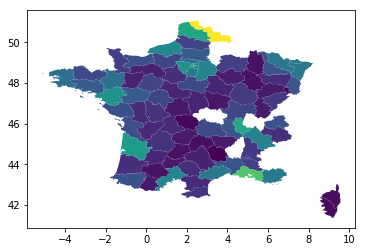

In [43]:
df.plot(column='Registered')

In [48]:
def prepend_zero(code):
    if len(code) == 1:
        return '0' + code
    return code

df_department['Department code'] = df_department['Department code'].apply(prepend_zero)

In [49]:
df = gdf_department.merge(df_department, how='inner', left_on='code', right_on='Department code')

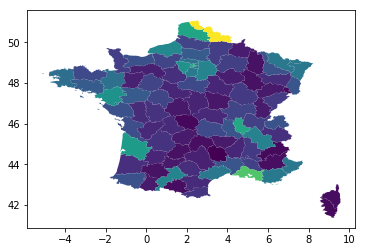

In [50]:
df.plot(column='Registered')

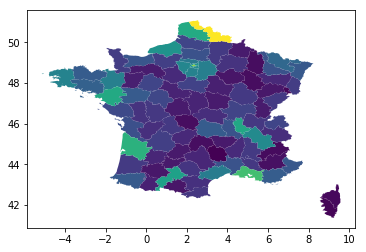

In [51]:
df.plot(column='Choice A')

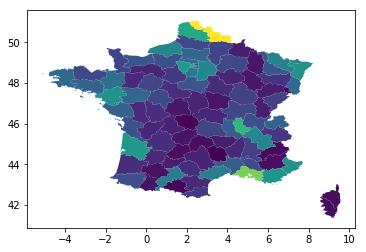

In [52]:
df.plot(column='Choice B')

In [53]:
df_normalized = df.copy()

In [55]:
df_normalized['Choice A'] /= df[['Choice A', 'Choice B']].sum(axis=1)
df_normalized['Choice B'] /= df[['Choice A', 'Choice B']].sum(axis=1)

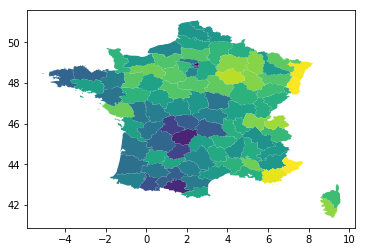

In [57]:
df_normalized.plot(column='Choice B')

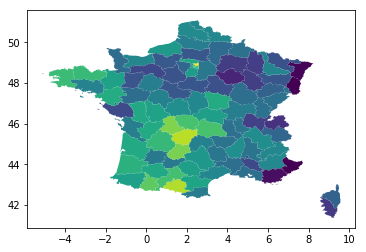

In [58]:
df_normalized.plot(column='Choice A')